## Cross Sell Vehicle Insurance Prediction 🏠 🏥

#### To Identify the Health Insurance Owners' who will be interested in Vehicle Insurance

**VISION of the Project**: An Insurance Company should be able to identify prospective Auto Insurance holders from within its existing pool of health Insurance holders. Successful cross selling efforts could also strengthen the brand’s image and position in the Insurance market. 

**ISSUE to address**: Health Insurances are considered by many as one of the most important financial covers any individual or household can possess at the time of an untimely medical condition or accident, due to which it has been one of the top selling insurances for many years now. However, in the past few years, Auto Insurance has slowly made its name as the most profitable insurance sold in the market owing to increasing no of vehicle owners and raising awareness of the benefits offered by vehicle insurances, to cover expensive repairs or damages due to accidents. However, searching for prospective insurance buyers could be a very laborious and costly process for any company.

**APPROACH to solve the Issue**: An approach to achieve this would be to use the records of all existing Health Insurance holders, including those who also have an Auto Insurance, perform a detailed analysis and use Machine Learning to create a predictive model that could identify which Health Insurance holders could be potential Vehicle Insurance buyers based on their profile.


# Variable Description

- id: Unique ID for the customer

- Gender: Gender of the customer

- Age:	Age of the customer

- Driving_License:	0 : Customer does not have DL, 1 : Customer already has DL

- Region_Code:	Unique code for the region of the customer

- Previously_Insured:	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

- Vehicle_Age:	Age of the Vehicle

- Vehicle_Damage:	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

- Annual_Premium:	The amount customer needs to pay as premium in the year

- PolicySalesChannel:	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

- Vintage:	Number of Days, Customer has been associated with the company

- Response:	1 : Customer is interested, 0 : Customer is not interested

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [96]:
data = pd.read_csv('train.csv')

# Dataset Description

In [97]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [98]:
data.size

4573308

In [99]:
data.shape

(381109, 12)

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [101]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [102]:
data.select_dtypes(include=np.object).head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


In [103]:
data.select_dtypes(include=np.object).nunique()

Gender            2
Vehicle_Age       3
Vehicle_Damage    2
dtype: int64

In [104]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Inferences - 
- The training dataset contains close to 380K or 3.8 lakh records.
- The training dataset has 11 independent features and 1 dependent / target variable.
- Within the independent features, 3 are categorical features
- Remaining 8 are numerical in nature.
- The dataset contains no missing values.
- The no. of unique categories within the categorical features are between 2-3.

# Data Cleaning

In [105]:
for i in data.select_dtypes(include=np.object).columns:
    print(i)
    print(data[i].unique())
    print()

Gender
['Male' 'Female']

Vehicle_Age
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage
['Yes' 'No']



In [106]:
data.describe().iloc[:,:-1]

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


In [107]:
for i in data.select_dtypes(include=np.number).columns[:-1]:
    print(i)
    print(data[i].nunique())
    print()

id
381109

Age
66

Driving_License
2

Region_Code
53

Previously_Insured
2

Annual_Premium
48838

Policy_Sales_Channel
155

Vintage
290



In [108]:
data.select_dtypes(include=np.number).head().iloc[:,:-1]

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,40454.0,26.0,217
1,2,76,1,3.0,0,33536.0,26.0,183
2,3,47,1,28.0,0,38294.0,26.0,27
3,4,21,1,11.0,1,28619.0,152.0,203
4,5,29,1,41.0,1,27496.0,152.0,39


#### Observations - 
From the observations made on the structure and values present in the features and on comparing them with the description of the variables, we can conclude -
- ID will be of no use to us as it will be unique to each record. Hence it can be removed.
- Region_Code should be a categorical feature as it contains a code for the location the customer resides in.
- Policy Sales Channel should be categorical as it contains codes for various type of sales channels.
- Driving Licence should be a categorical feature as it contains only 2 values i.e 0 and 1 with each number depicting whether a customer has a driving licence or not.
- Previously ensured should be a categorical feature as it contains only 2 values i.e 0 and 1 with each number depicting whether a customer had previously taken an insurance or not.
- Response (target feature) should also be a categorical feature as it contains only 2 values i.e 0 and 1 with each number depicting whether a health insurance customer will take a vehicle insurance or not.
- Also, so better clarity on categories for the purpose of model building and feature selection, we will give proper labels to the categories of driving license and previously ensured

In [109]:
data.drop('id',axis=1,inplace=True)

In [110]:
data[["Region_Code","Policy_Sales_Channel"]] = data[["Region_Code","Policy_Sales_Channel"]].astype('int').astype("object")

In [111]:
data[["Driving_License","Previously_Insured","Response"]] = data[["Driving_License","Previously_Insured","Response"]].astype('object') 


In [112]:
data.Driving_License.replace({1:"Has_License",0:"No_License"},inplace=True)
data.Previously_Insured.replace({1:"Vehicle_Insured",0:"Vehicle_Not_Insured"},inplace=True)
data.Vehicle_Damage.replace({"Yes":"Vehicle_Damaged","No":"Vehicle_Not_Damaged"},inplace=True)
data.Vehicle_Age.replace({"> 2 Years":"MoreThan2Years","1-2 Year":"Years1-2","< 1 Year":"LessThan1Year"},inplace=True)

In [113]:
data.select_dtypes(include=np.object).head()

,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
0,Male,Has_License,28,Vehicle_Not_Insured,MoreThan2Years,Vehicle_Damaged,26,1
1,Male,Has_License,3,Vehicle_Not_Insured,Years1-2,Vehicle_Not_Damaged,26,0
2,Male,Has_License,28,Vehicle_Not_Insured,MoreThan2Years,Vehicle_Damaged,26,1
3,Male,Has_License,11,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,152,0
4,Female,Has_License,41,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,152,0


In [114]:
data.select_dtypes(include=np.number).head()

,Age,Annual_Premium,Vintage
0,44,40454.0,217
1,76,33536.0,183
2,47,38294.0,27
3,21,28619.0,203
4,29,27496.0,39


# Exploratory Data Analysis

## Univariate Analysis

In [115]:
num_data = data.select_dtypes(include=np.number)
cat_data = data.select_dtypes(include=np.object)

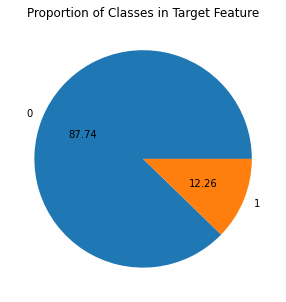

In [116]:
plt.figure(figsize = (5,5))
proportions = cat_data.Response.value_counts(1)*100
labels = cat_data.Response.value_counts(1).index
plt.pie(proportions,labels=labels,autopct="%.2f")
plt.title("Proportion of Classes in Target Feature")
plt.show()

In [117]:
num_data.skew()

Age               0.672539
Annual_Premium    1.766087
Vintage           0.003030
dtype: float64

In [118]:
num_data.describe()

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


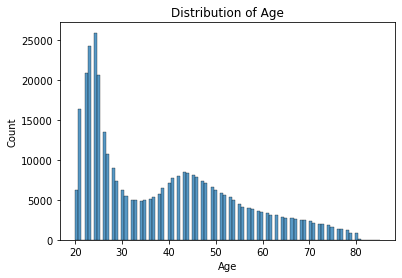

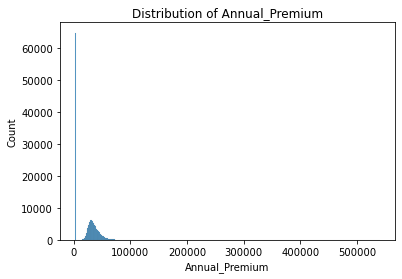

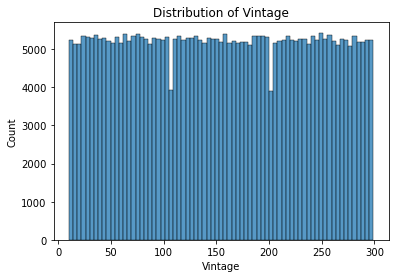

In [119]:
for i in num_data.columns:
    sns.histplot(num_data[i])
    plt.title(f"Distribution of {i}")
    plt.show()

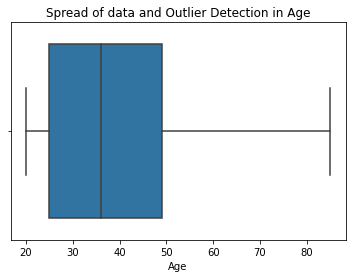

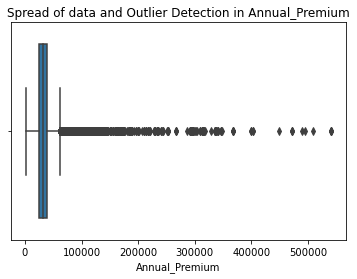

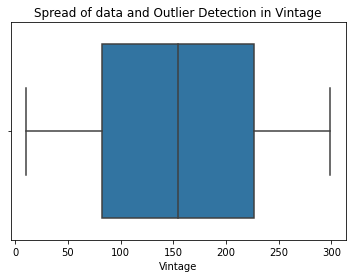

In [120]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.title(f"Spread of data and Outlier Detection in {i}")
    plt.show()

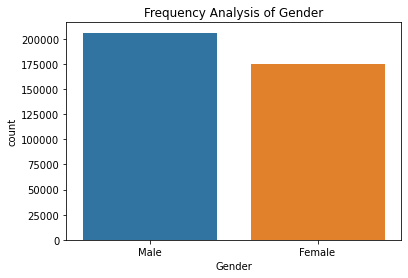

In [121]:
sns.countplot(cat_data.Gender)
plt.title("Frequency Analysis of Gender")
plt.show()

In [122]:
cat_data.Gender.value_counts(1)*100

Male      54.07613
Female    45.92387
Name: Gender, dtype: float64

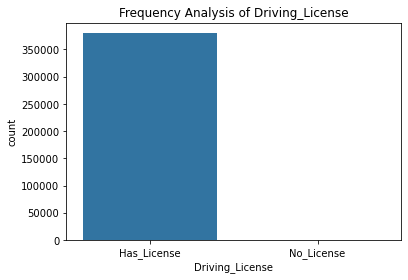

In [123]:
sns.countplot(cat_data.Driving_License)
plt.title("Frequency Analysis of Driving_License")
plt.show()

In [124]:
cat_data.Driving_License.value_counts(1)*100

Has_License    99.786938
No_License      0.213062
Name: Driving_License, dtype: float64

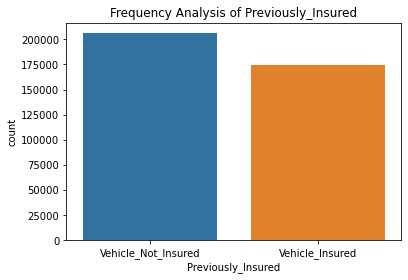

In [125]:
sns.countplot(cat_data.Previously_Insured)
plt.title("Frequency Analysis of Previously_Insured")
plt.show()

In [126]:
cat_data.Previously_Insured.value_counts(1)*100

Vehicle_Not_Insured    54.178988
Vehicle_Insured        45.821012
Name: Previously_Insured, dtype: float64

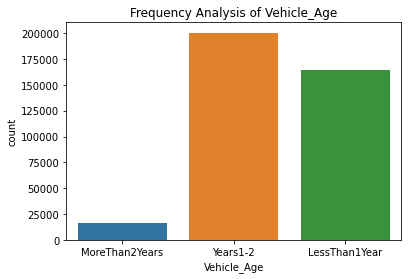

In [127]:
sns.countplot(cat_data.Vehicle_Age)
plt.title("Frequency Analysis of Vehicle_Age")
plt.show()

In [128]:
cat_data.Vehicle_Age.value_counts(1)*100

Years1-2          52.561341
LessThan1Year     43.238549
MoreThan2Years     4.200111
Name: Vehicle_Age, dtype: float64

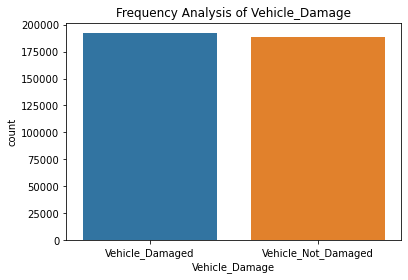

In [129]:
sns.countplot(cat_data.Vehicle_Damage)
plt.title("Frequency Analysis of Vehicle_Damage")
plt.show()

In [130]:
cat_data.Vehicle_Damage.value_counts(1)*100

Vehicle_Damaged        50.487656
Vehicle_Not_Damaged    49.512344
Name: Vehicle_Damage, dtype: float64

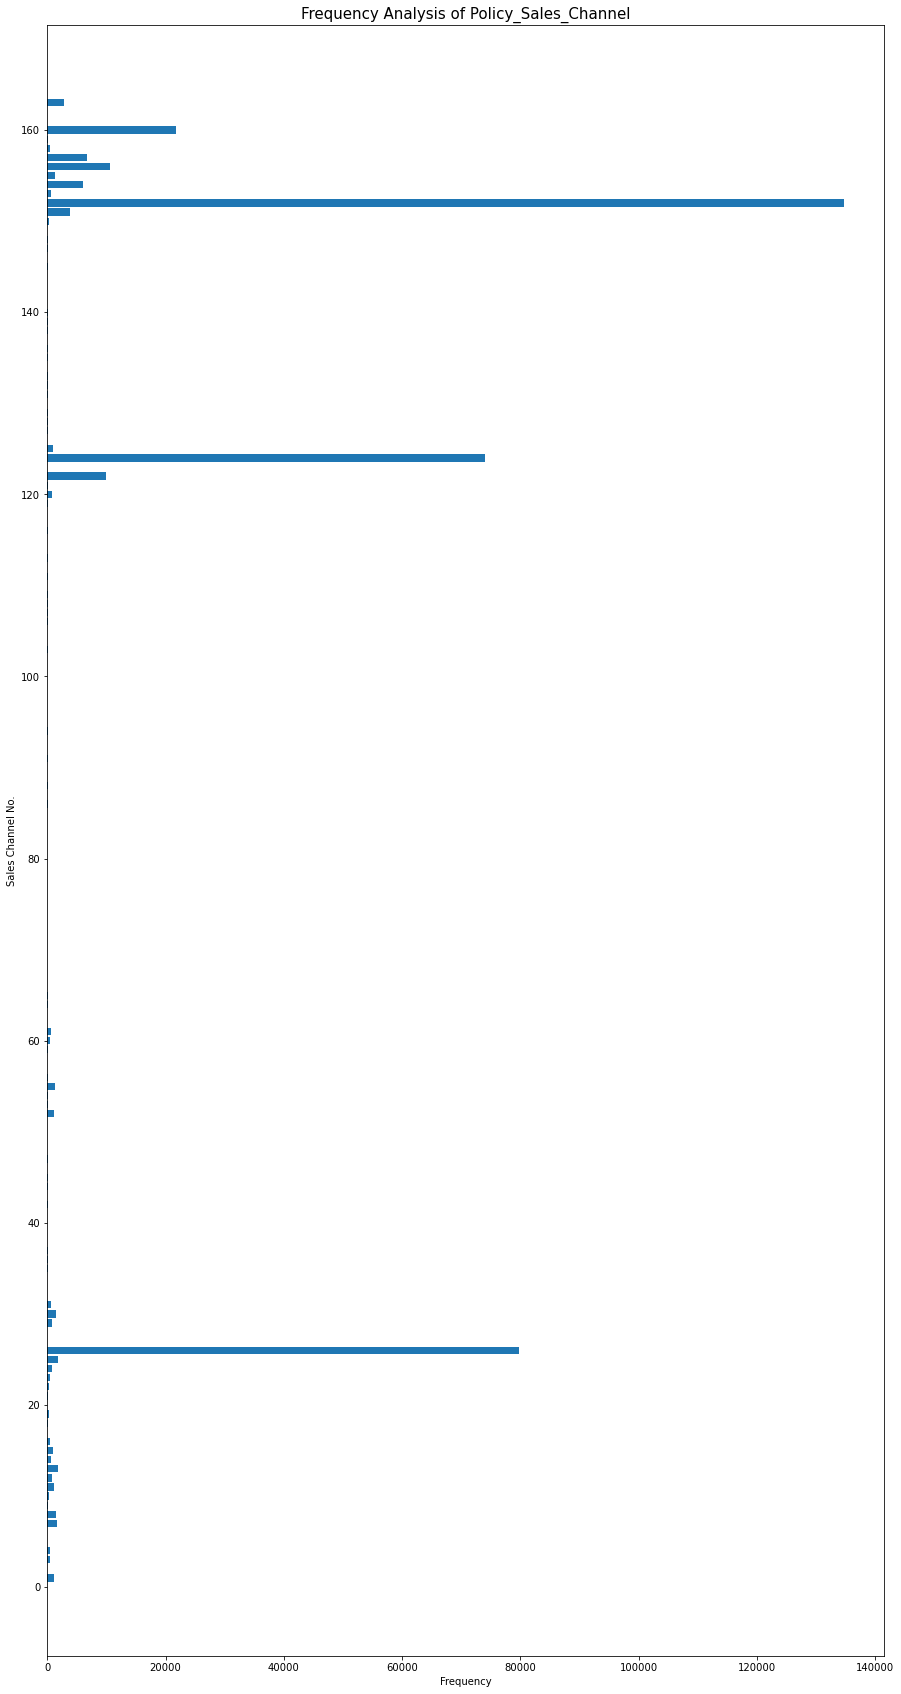

In [131]:
plt.figure(figsize=(15,30))
labels = data.Policy_Sales_Channel.value_counts().index
values = data.Policy_Sales_Channel.value_counts()
plt.barh(y=labels,width=values)
plt.ylabel("Sales Channel No.")
plt.xlabel("Frequency")
plt.title("Frequency Analysis of Policy_Sales_Channel",size=15)
plt.show()

In [132]:
cat_data.Policy_Sales_Channel.value_counts(1)*100

152    35.366260
26     20.912652
124    19.415705
160     5.714638
156     2.797362
         ...    
149     0.000262
84      0.000262
123     0.000262
144     0.000262
143     0.000262
Name: Policy_Sales_Channel, Length: 155, dtype: float64

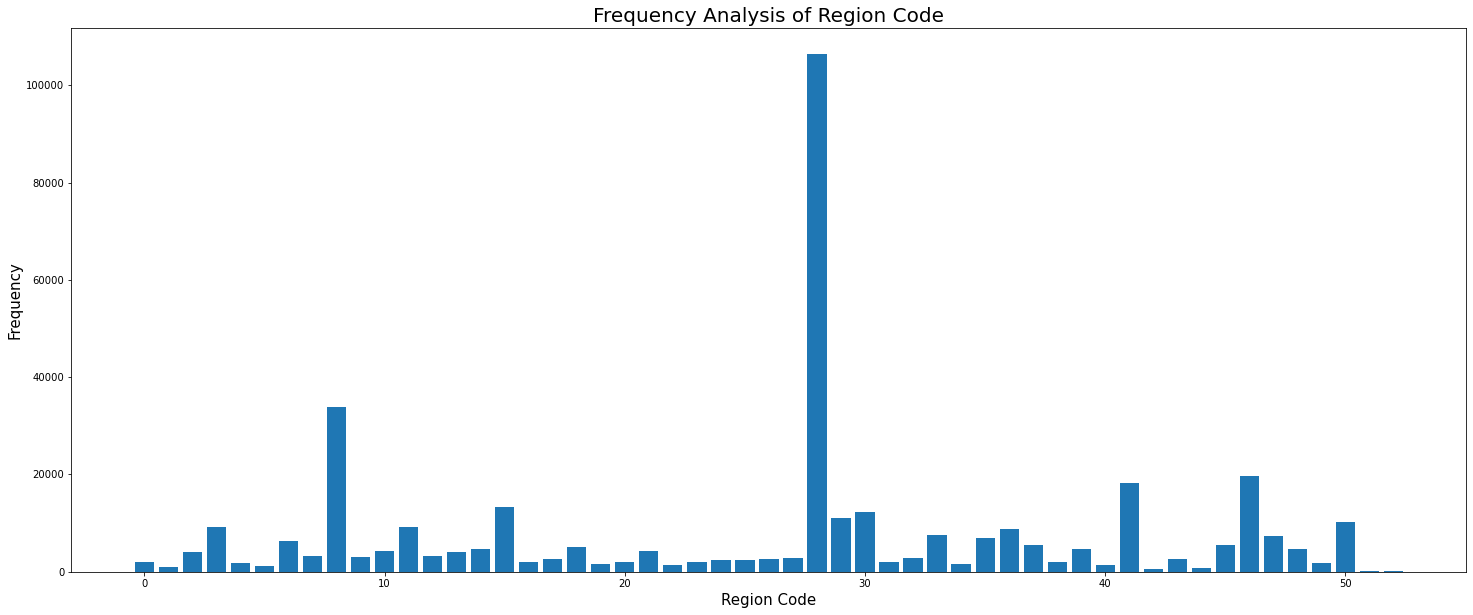

In [133]:
plt.figure(figsize=(25,10))
labels = data.Region_Code.value_counts().index
values = data.Region_Code.value_counts()
plt.bar(x=labels,height=values)
plt.xlabel("Region Code",size=15)
plt.ylabel("Frequency",size=15)
plt.title("Frequency Analysis of Region Code",size=20)
plt.show()

In [134]:
cat_data.Region_Code.value_counts(1)*100

28    27.922458
8      8.889058
46     5.181982
41     4.792067
15     3.491914
30     3.198822
29     2.903369
50     2.687683
3      2.427390
11     2.422404
36     2.308264
33     2.008349
47     1.951148
35     1.821526
6      1.647823
45     1.470708
37     1.443419
18     1.352107
48     1.228258
14     1.227470
39     1.218549
10     1.147703
21     1.119365
2      1.059539
13     1.059015
7      0.860384
12     0.839130
9      0.813678
27     0.740733
32     0.731287
43     0.692453
17     0.686680
26     0.678808
25     0.656767
24     0.633677
38     0.531606
0      0.530294
16     0.526621
31     0.514289
23     0.514289
20     0.507729
49     0.480702
4      0.472568
34     0.436620
19     0.402772
22     0.343471
40     0.339798
5      0.335600
1      0.264491
44     0.212013
42     0.155074
52     0.070059
51     0.048018
Name: Region_Code, dtype: float64

#### Inferences - 
For Numerical Features - 
- Age and Annual Premium are postively skewed, with annual premium having a large skewness values of 1.6
- Vintage or duration of tenure of customers is uniformly distributed.
- Due to very high skewness, Annual Premium has large frequency and large value outliers.


- Age of most of the insurance holders is around 20-30 years, with a significant number of holders also found to be in the range of 40-50 years. However, due to a slightly bi-model appearance, we can say the median age of insurance holders in this dataset
is around 36 years.
- Median Premium most health insurance holders pay per annum is around 31000.
- In respect to vintage, the no. of insurance holders who have held the insurance for a specific period are more or less uniform or identical. No clear majority.


For Categorcal Features - 
- Except Sales Channel and Region, all other categorical features have around 2-3 unique categories only.
- However, within dirving license, % of those without licence is less than 1%. Such a feature will not be of any use.
- However, Sales Channel and Region have more than 20 unique categories, which would make it difficult to encode later.
- However, we have also observed that both sales channel and region have only a few dominating categories, with others very svehiclecely represented. We can considering grouping such categories.


- We can observe that the target feature i.e whether a health insuance holder would be a vehicle insurance, is highly imbalanced, with 87% of health insurance holders not having purchased a vehicle insurance.
- We have more males than females in the dataset, but only by a margin of around 25k.
- Almost all the health insurance holders have a driving license
- We have more health insurance holders who have been previously insured for a vehicle insurance, however, by a very small margin of 25k.
- More than 50% of the vehicle owners have vehicles which are around 1-2 years old.
- Amongst all vehicle owners, the proportion of those who suffered vehicle damage to those who didnt are nearly same.
- In terms of sales policy channels frequently adopted, we observed specific channels in the range 0-30, 120-125 and 150-160. However, the most adopted sales policy channels are 152, 26 and 124.
- In terms of region, we can see majority of the insurance holders coming from region number 28, followed by 8.

### Bi-variate Analysis

In [135]:
data[data.Response==0].describe()

,Age,Annual_Premium,Vintage
count,334399.000000,334399.000000,334399.000000
mean,38.178227,30419.160276,154.380243
std,15.816052,16998.293197,83.661975
min,20.000000,2630.000000,10.000000
25%,24.000000,24351.000000,82.000000
50%,34.000000,31504.000000,154.000000
75%,49.000000,39120.000000,227.000000
max,85.000000,540165.000000,299.000000


In [136]:
data[data.Response==1].describe()

,Age,Annual_Premium,Vintage
count,46710.000000,46710.000000,46710.000000
mean,43.435560,31604.092742,154.112246
std,12.168924,18646.508040,83.738574
min,20.000000,2630.000000,10.000000
25%,35.000000,24868.000000,82.000000
50%,43.000000,33002.000000,154.000000
75%,51.000000,41297.000000,226.000000
max,83.000000,540165.000000,299.000000


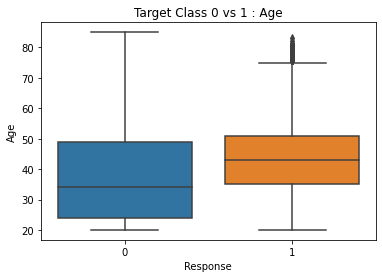

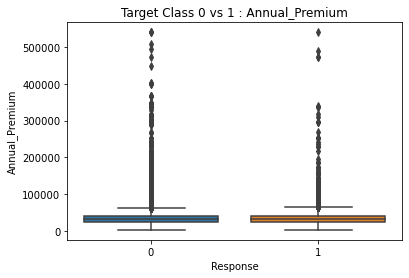

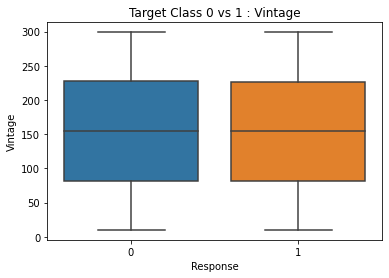

In [137]:
for i in data.select_dtypes(include=np.number).columns:
    sns.boxplot(x=data.Response,y=data[i])
    plt.title(f"Target Class 0 vs 1 : {i}")
    plt.show()

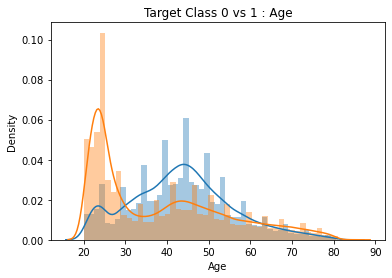

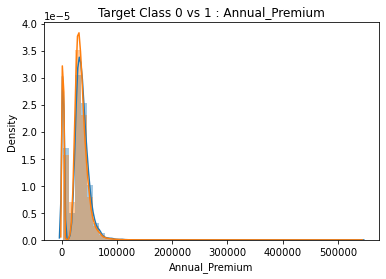

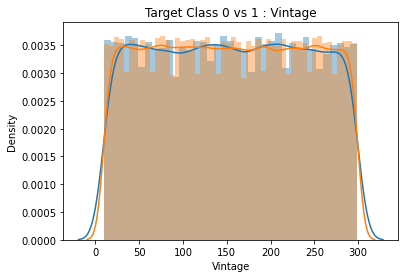

In [138]:
for i in data.select_dtypes(include=np.number).columns:
    sns.distplot(data[data.Response==1][i])
    sns.distplot(data[data.Response==0][i])
    plt.title(f"Target Class 0 vs 1 : {i}")
    plt.show()

In [139]:
print("STATISTICAL TEST - T-TEST INDEPENDENT SAMPLES")
print("To determine different in sample means of target class 0 and 1")
print("Null Hypothesis: There is no difference in means")
print('Alternate Hypothesis: There is a difference in means')
print()

for i in ["Age","Vintage"]:
    print(i)
    print("P value for no difference:",stats.ttest_ind(data[data.Response==0][i],data[data.Response==1][i])[1])
    print()

STATISTICAL TEST - T-TEST INDEPENDENT SAMPLES
To determine different in sample means of target class 0 and 1
Null Hypothesis: There is no difference in means
Alternate Hypothesis: There is a difference in means

Age
P value for no difference: 0.0

Vintage
P value for no difference: 0.5167036521412091



In [140]:
print("STATISTICAL TEST - MANN WHITNEY U")
print("To determine different in sample medians of target class 0 and 1")
print("Null Hypothesis: There is no difference in medians")
print('Alternate Hypothesis: There is a difference in medians')
print()
print("P value for no difference:",stats.mannwhitneyu(data[data.Response==0][i],data[data.Response==1][i])[1])
print()

STATISTICAL TEST - MANN WHITNEY U
To determine different in sample medians of target class 0 and 1
Null Hypothesis: There is no difference in medians
Alternate Hypothesis: There is a difference in medians

P value for no difference: 0.2581504947885175



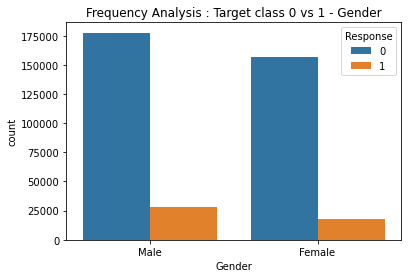

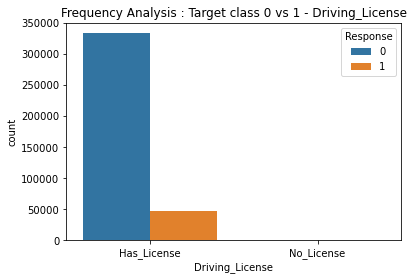

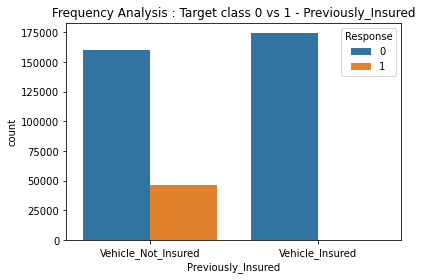

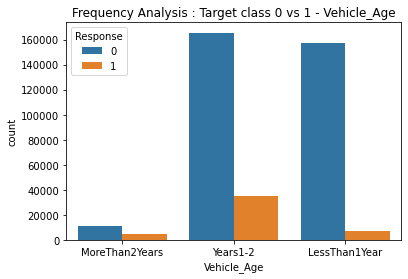

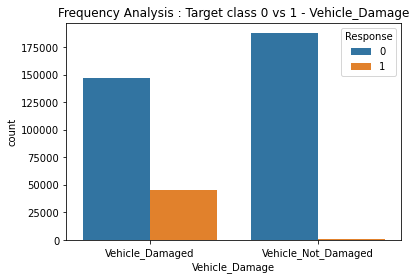

In [141]:
for col in cat_data.drop(["Region_Code","Policy_Sales_Channel","Response"],axis=1).columns:
    sns.countplot(x=data[col],hue=data.Response)
    plt.title(f"Frequency Analysis : Target class 0 vs 1 - {col}")
    plt.show()

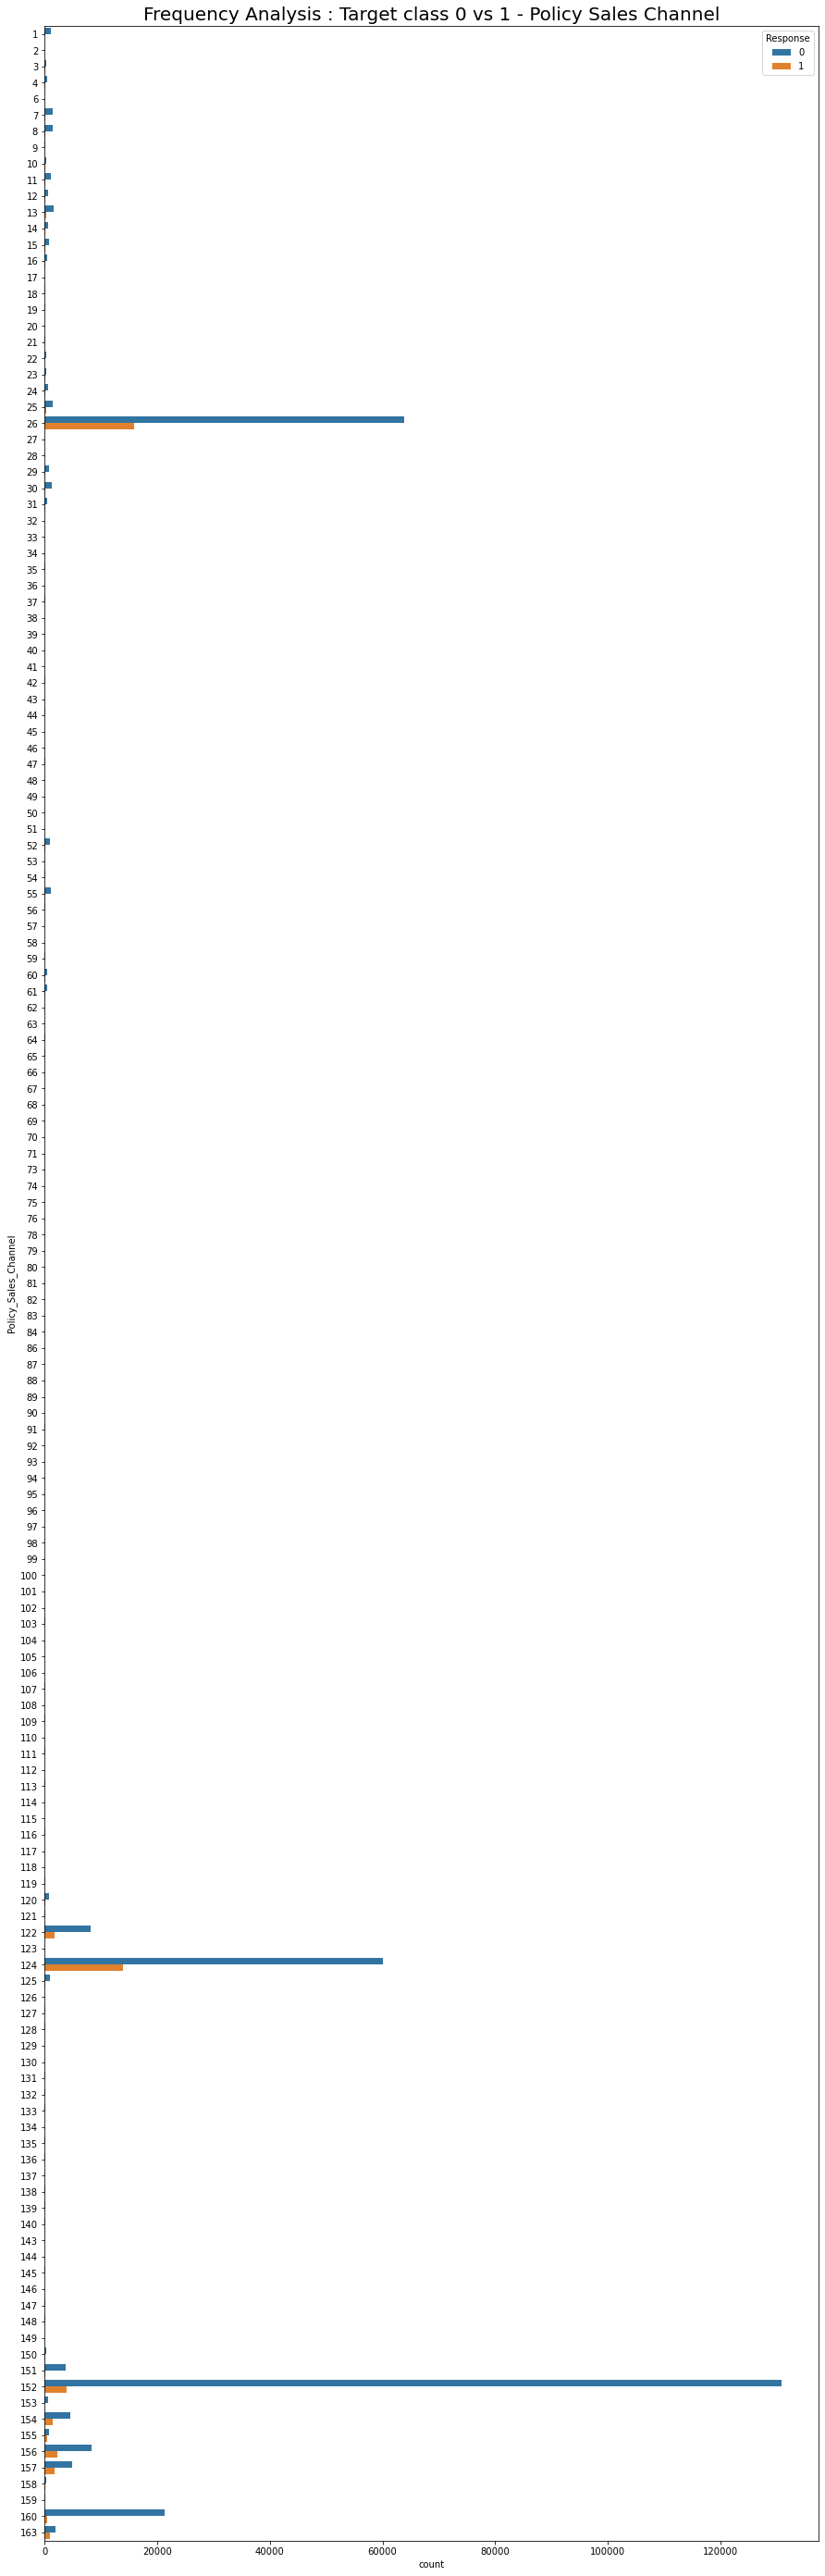

In [142]:
plt.figure(figsize = (15,50))
sns.countplot(y=data.Policy_Sales_Channel,hue=data.Response)
plt.title(f"Frequency Analysis : Target class 0 vs 1 - Policy Sales Channel",size=20)
plt.show()

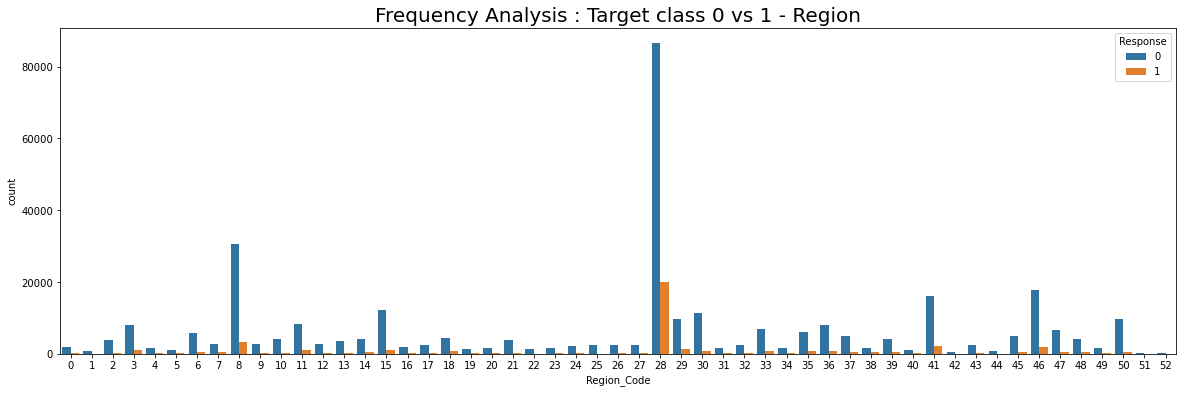

In [143]:
plt.figure(figsize = (20,6))
sns.countplot(x=data.Region_Code,hue=data.Response)
plt.title(f"Frequency Analysis : Target class 0 vs 1 - Region",size=20)
plt.show()

In [144]:
print("STATISTICAL TEST - CHI SQUARE TEST OF INDEPENDENCE")
print("To determine different in target classes are dependent on the predictors")
print("Null Hypothesis: The target class and predictor are independent of each other.")
print('Alternate Hypothesis: The target class and predictor are independent of each other.')
print()

for i in cat_data.columns[:-1]:
    print(i)
    print("P value for no difference:",stats.chi2_contingency(pd.crosstab(data[i],data.Response))[1])
    print()

STATISTICAL TEST - CHI SQUARE TEST OF INDEPENDENCE
To determine different in target classes are dependent on the predictors
Null Hypothesis: The target class and predictor are independent of each other.
Alternate Hypothesis: The target class and predictor are independent of each other.

Gender
P value for no difference: 7.665800628415621e-230

Driving_License
P value for no difference: 5.111753504019177e-10

Region_Code
P value for no difference: 0.0

Previously_Insured
P value for no difference: 0.0

Vehicle_Age
P value for no difference: 0.0

Vehicle_Damage
P value for no difference: 0.0

Policy_Sales_Channel
P value for no difference: 0.0



#### Inference - 

For numerical features:
- In terms of age, there appears to be a significant difference the means of people with and without vehicle insurance. The median age of non insurance holders appears to be around 35 whereas those with insurance appear to be around 42-44.
- In terms of Annual Premium, graphically, we dont see any difference in the median distributions of those with insurance and without insurance and they look identical. The median premiums paid for both groups are around 30-33K. Since our data samples are not normal for annual premium we went with mann-whitney u test to test for difference in medians.
- In terms of days spent / Vintage, we again see no difference in the distributions for those with and without vehicle insurance. Due to uniform distributions, the median days spent for both is around 154.
- Based on statistical analysis on to test for significant difference in means or median, it was observed that Vintage and Annual Premium were numerical features for which p > 0.05, hence we could conclude that there is no difference in average/ medians value of those with and without insurance. Hence, we can exclude Vintage and Annual Premium from our analysis later.


For categorical features:
- We can see that all those who have a driving licence actually took the vehicle insurance. However, based on analysis of unique values, we also observed that the proportion of those who didn have a driving license is negligible. There is hardly any variance in terms of the categories and the predictions will always be biased towards the ones with license. Hence, it will be removed.
- We can also observe that those who already have a vehicle insurance didnt take another vehicle insurance.
- Majority of those who took the vehicle insurance have vehicles which are 1-2 years old.
- Almost all those who did take a vehicle insurance had actually suffered damages to their vehicles in the past.
- Most of those who took vehicle insurance were sold insurance through sales channel 26 and 124.
- Majority of those who took vehicle insurance were from region coded 28.
- Based on the statistical analysis to check dependency of target feature on a predictor, we found that p < 0.05 for all pairs of categorical features and target classes. Hence we cannot remove any categorcal feature from the analysis.

## Multi-variate Analysis

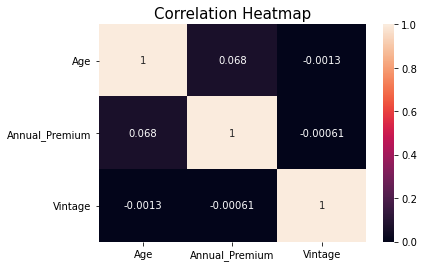

In [145]:
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Heatmap",size=15)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

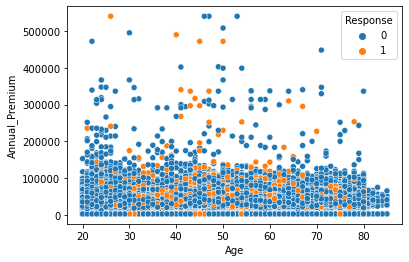

In [146]:
sns.scatterplot(data.Age,data.Annual_Premium,hue=data.Response)

<AxesSubplot:xlabel='Age', ylabel='Vintage'>

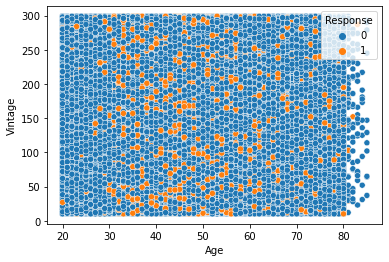

In [147]:
sns.scatterplot(data.Age,data.Vintage,hue=data.Response)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Vintage'>

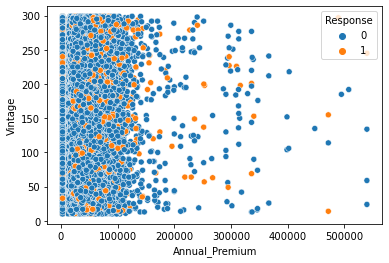

In [148]:
sns.scatterplot(data.Annual_Premium,data.Vintage,hue=data.Response)

#### Inferences
- Based on the correlation heatmap, we can observe that none of the pairs of numerical features have a considerable relationship with each other.
- Based on the scatterplots, on analyzing the relationship between two numerical features and also understanding how they help to seperate the target classes, we can conclude that the target classes cannot be seperated by the interaction of two numerical features.

#### KEY CONCLUSIONS FROM EDA
- We can conclude that the target classes aren't going to be linearly seperable based on the numerical features.
- Also, based on presence of positive skewnes and extreme outliers in the dataset, transformations might need to be performed on the numerical features, which could hurt the interpretation of the model and busines interpretation.
- Based on the bivariate analysis of categorical features and the trends in respect to target classes , we can conclude that using tree based algorithms would work well.
- Also due to presence of more than 380K records, a knn model would computationally take a large amount of time to run as it would have to calculate distance of 1 records with all other records in training and repeat that process again and again. 
Hence we won't consider a KNN Model during model building.
- Hence we will focus mainly on tree based algorithms during model building.
- Also due to the presence of several categorical features, which might need to get encoded, we might decide on using naive bayes.

# Data Preparation

In [149]:
data_copy = data.copy()

In [150]:
data.drop(["Vintage","Annual_Premium","Driving_License"],axis=1,inplace=True)

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder

In [152]:
data.select_dtypes(include=np.object).nunique()

Gender                    2
Region_Code              53
Previously_Insured        2
Vehicle_Age               3
Vehicle_Damage            2
Policy_Sales_Channel    155
Response                  2
dtype: int64

#### NOTE - 
- Since we aren't performing regression or knn, we won't need to worry about transforming the data to be normal or scaling.
- Also, since tree based algorithm are robust to outliers, no need to treat them. However, if models do stuggle, we can consider it as a means of improvment.
- The only numerical feature in the dataset i.e age, doesnt seem to have any outliers.
- Since we don't have any missing values, no need for missing value treatment.
- The only need is to encode the categorical features.

Important Points about Encoding:
- Except region and sales policy, all other features can be one hot encoded as they have only around 2-3 unique categories.
- As region code and sales channel policy have more than 50 unique categories, we cannot encode them directly.
- Target and frequency encoding is not appropriate as it won't help in any logical interpretation.
- Label encoding is not possible as we don't have any logical order in the above two categorical features.
- Hence, we need to try to one hot encode them. However, one hot encoding we will create n number of addition columns, where n is the no. of unique categories in the variable, which will lead to curse of dimensionality.
- To prevent that, we will group together all categories which contribute less than 2% to the total records in the dataset under the category "others".

In [153]:
Region_Dict = {}
for i,a in list(zip(data.Region_Code.value_counts().index.unique(),data.Region_Code.value_counts(1)*100)):
    if a < 2:
        Region_Dict[i] = "Others"
    else:
        Region_Dict[i] = "Region_" + str(i)

In [154]:
Policy_Sales_Channel_Dict = {}
for i,a in list(zip(data.Policy_Sales_Channel.value_counts().index.unique(),data.Policy_Sales_Channel.value_counts(1)*100)):
    if a < 2:
        Policy_Sales_Channel_Dict[i] = "Others"
    else:
        Policy_Sales_Channel_Dict[i] = "Channel_" + str(i)

In [155]:
data.Region_Code = data.Region_Code.map(Region_Dict)
data.Policy_Sales_Channel = data.Policy_Sales_Channel.map(Policy_Sales_Channel_Dict)

In [156]:
X = data.drop("Response",axis=1)
y= data.Response.astype("int")

In [157]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.30,random_state=0,stratify=y)

In [158]:
xtrain.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
316624,Female,25,Others,Vehicle_Not_Insured,LessThan1Year,Vehicle_Damaged,Channel_152
126373,Female,23,Region_46,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,Channel_152
30736,Male,22,Others,Vehicle_Not_Insured,LessThan1Year,Vehicle_Damaged,Channel_152
156924,Female,21,Region_30,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,Channel_160
86112,Female,23,Region_8,Vehicle_Insured,LessThan1Year,Vehicle_Not_Damaged,Channel_152


In [159]:
xtrain.select_dtypes(include=np.object).nunique()

Gender                   2
Region_Code             13
Previously_Insured       2
Vehicle_Age              3
Vehicle_Damage           2
Policy_Sales_Channel     7
dtype: int64

- No. of categories in Region and Policy Sales Channel have been drastically reduced and hence they can be one hot encoded

In [160]:
OHE = OneHotEncoder(drop="first",handle_unknown="error").fit(xtrain[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]])

In [161]:
xtrain_cat = pd.DataFrame(OHE.transform(xtrain[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=xtrain.index)

In [162]:
xtest_cat = pd.DataFrame(OHE.transform(xtest[["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"]]).toarray(),columns=OHE.get_feature_names(),index=xtest.index)

In [163]:
xtrain_cat.head()

,x0_Male,x1_Vehicle_Not_Insured,x2_MoreThan2Years,x2_Years1-2,x3_Vehicle_Not_Damaged,x4_Region_11,x4_Region_15,x4_Region_28,x4_Region_29,x4_Region_3,...,x4_Region_41,x4_Region_46,x4_Region_50,x4_Region_8,x5_Channel_124,x5_Channel_152,x5_Channel_156,x5_Channel_160,x5_Channel_26,x5_Others
316624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126373,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30736,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
156924,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
86112,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [164]:
xtrain = xtrain.merge(xtrain_cat,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)

In [165]:
xtest = xtest.merge(xtest_cat,left_index=True,right_index=True).drop(["Gender","Previously_Insured","Vehicle_Age","Vehicle_Damage","Region_Code","Policy_Sales_Channel"],axis=1)

In [166]:
xtrain.head()

,Age,x0_Male,x1_Vehicle_Not_Insured,x2_MoreThan2Years,x2_Years1-2,x3_Vehicle_Not_Damaged,x4_Region_11,x4_Region_15,x4_Region_28,x4_Region_29,...,x4_Region_41,x4_Region_46,x4_Region_50,x4_Region_8,x5_Channel_124,x5_Channel_152,x5_Channel_156,x5_Channel_160,x5_Channel_26,x5_Others
316624,25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
126373,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30736,22,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
156924,21,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
86112,23,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Model Building

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,f1_score,classification_report,confusion_matrix

In [168]:
results = pd.DataFrame({"Model":None,"Train F1":None,"Test F1":None,"CV Mean F1":None,"CV std in scores":None},index=range(0,6))

In [169]:
nb = BernoulliNB().fit(xtrain.drop("Age",axis=1),ytrain)
f1_train_nb = f1_score(ytrain,nb.predict(xtrain.drop("Age",axis=1)))
f1_test_nb = f1_score(ytest,nb.predict(xtest.drop("Age",axis=1)))
print("f1:",f1_train_nb)
print()
print("Model Performance Report")
print(classification_report(ytrain,nb.predict(xtrain.drop("Age",axis=1))))

f1: 0.42011878309282097

Model Performance Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83    234079
           1       0.29      0.78      0.42     32697

    accuracy                           0.74    266776
   macro avg       0.62      0.75      0.62    266776
weighted avg       0.88      0.74      0.78    266776



In [170]:
cv_nb = cross_val_score(BernoulliNB(),xtrain.drop("Age",axis=1),ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_nb.mean())
print("Deviation in f1 scores:",cv_nb.std())
results.iloc[0,0] = "Naive Bayes"
results.iloc[0,1] = f1_train_nb
results.iloc[0,2] = f1_test_nb
results.iloc[0,3] = cv_nb.mean()
results.iloc[0,4] = cv_nb.std()

Mean of f1 scores: 0.4194529861846674
Deviation in f1 scores: 0.0017372073381297208


In [171]:
dt = DecisionTreeClassifier().fit(xtrain,ytrain)
f1_train_dt = f1_score(ytrain,dt.predict(xtrain))
f1_test_dt = f1_score(ytest,dt.predict(xtest))
print("f1 score:",f1_train_dt)
print()
print("Model Performance Report")
print(classification_report(ytrain,dt.predict(xtrain)))

f1 score: 0.19277171908750856

Model Performance Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    234079
           1       0.69      0.11      0.19     32697

    accuracy                           0.89    266776
   macro avg       0.79      0.55      0.57    266776
weighted avg       0.87      0.89      0.85    266776



In [172]:
cv_dt = cross_val_score(DecisionTreeClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt.mean())
print("Deviation in f1 scores:",cv_dt.std())
results.iloc[1,0] = "Decision Tree"
results.iloc[1,1] = f1_train_dt
results.iloc[1,2] = f1_test_dt
results.iloc[1,3] = cv_dt.mean()
results.iloc[1,4] = cv_dt.std()

Mean of f1 scores: 0.11372283528202093
Deviation in f1 scores: 0.004577508215080922


In [173]:
rf = RandomForestClassifier().fit(xtrain,ytrain)
f1_train_rf = f1_score(ytrain,rf.predict(xtrain))
f1_test_rf = f1_score(ytest,rf.predict(xtest))
print("f1:",f1_train_rf)
print()
print("Model Performance Report")
print(classification_report(ytrain,rf.predict(xtrain)))

f1: 0.21944324172885413

Model Performance Report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94    234079
           1       0.66      0.13      0.22     32697

    accuracy                           0.89    266776
   macro avg       0.77      0.56      0.58    266776
weighted avg       0.86      0.89      0.85    266776



In [174]:
cv_rf = cross_val_score(RandomForestClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_rf.mean())
print("Deviation in f1 scores:",cv_rf.std())
results.iloc[2,0] = "Random Forest"
results.iloc[2,1] = f1_train_rf
results.iloc[2,2] = f1_test_rf
results.iloc[2,3] = cv_rf.mean()
results.iloc[2,4] = cv_rf.std()

Mean of f1 scores: 0.13856412558963346
Deviation in f1 scores: 0.0022064274698478945


In [175]:
ada = AdaBoostClassifier().fit(xtrain,ytrain)
f1_train_ada = f1_score(ytrain,ada.predict(xtrain))
f1_test_ada = f1_score(ytest,ada.predict(xtest))
print("f1:",f1_train_ada)
print()
print("Model Performance Report")
print(classification_report(ytrain,ada.predict(xtrain)))

f1: 0.0031691857630424185

Model Performance Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234079
           1       0.44      0.00      0.00     32697

    accuracy                           0.88    266776
   macro avg       0.66      0.50      0.47    266776
weighted avg       0.82      0.88      0.82    266776



In [176]:
cv_ada = cross_val_score(AdaBoostClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_ada.mean())
print("Deviation in f1 scores:",cv_ada.std())
results.iloc[3,0] = "Adaboost"
results.iloc[3,1] = f1_train_ada
results.iloc[3,2] = f1_test_ada
results.iloc[3,3] = cv_ada.mean()
results.iloc[3,4] = cv_ada.std()

Mean of f1 scores: 0.0020727893394937563
Deviation in f1 scores: 0.0010792409650659414


In [177]:
gb = GradientBoostingClassifier().fit(xtrain,ytrain)
f1_train_gb = f1_score(ytrain,gb.predict(xtrain))
f1_test_gb = f1_score(ytest,gb.predict(xtest))
print("f1:",f1_train_gb)
print()
print("Model Performance Report")
print(classification_report(ytrain,gb.predict(xtrain)))

f1: 0.0

Model Performance Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234079
           1       0.00      0.00      0.00     32697

    accuracy                           0.88    266776
   macro avg       0.44      0.50      0.47    266776
weighted avg       0.77      0.88      0.82    266776



In [178]:
cv_gb = cross_val_score(GradientBoostingClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_gb.mean())
print("Deviation in f1 scores:",cv_gb.std())
results.iloc[4,0] = "Gradient boost"
results.iloc[4,1] = f1_train_gb
results.iloc[4,2] = f1_test_gb
results.iloc[4,3] = cv_gb.mean()
results.iloc[4,4] = cv_gb.std()

Mean of f1 scores: 0.0
Deviation in f1 scores: 0.0


In [179]:
xgb = XGBClassifier().fit(xtrain,ytrain)
f1_train_xgb = f1_score(ytrain,xgb.predict(xtrain))
f1_test_xgb = f1_score(ytest,xgb.predict(xtest))
print("f1:",f1_train_xgb)
print()
print("Model Performance Report")
print(classification_report(ytrain,xgb.predict(xtrain)))

[14:31:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
f1: 0.03255855480491652

Model Performance Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    234079
           1       0.61      0.02      0.03     32697

    accuracy                           0.88    266776
   macro avg       0.74      0.51      0.48    266776
weighted avg       0.85      0.88      0.82    266776



In [180]:
cv_xgb = cross_val_score(XGBClassifier(),xtrain,ytrain,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_xgb.mean())
print("Deviation in f1 scores:",cv_xgb.std())
results.iloc[5,0] = "XGB"
results.iloc[5,1] = f1_train_xgb
results.iloc[5,2] = f1_test_xgb
results.iloc[5,3] = cv_xgb.mean()
results.iloc[5,4] = cv_xgb.std()

[14:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean of f1 scores: 0.03397864129087977
Deviation in f1 scores: 0.00631

In [181]:
results

,Model,Train F1,Test F1,CV Mean F1,CV std in scores
0,Naive Bayes,0.420119,0.419407,0.419453,0.001737
1,Decision Tree,0.192772,0.102758,0.113723,0.004578
2,Random Forest,0.219443,0.123143,0.138564,0.002206
3,Adaboost,0.003169,0.003271,0.002073,0.001079
4,Gradient boost,0.0,0.0,0.0,0.0
5,XGB,0.032559,0.027388,0.033979,0.006314


#### Inferences - 

NOTE - Due to heavy imbalance in target classes, we need to give considerable importance to both precision and recall of class 1. Hence throughout the evaluation, we will focus on **F1 score**

We created 3 types of models - Probability, Tree based and boosting techniques.
- The naive bayes models produced the best results across all models despite the heavy imbalance due to the usage of probabilities only. It scored a f1 score of 0.419 on the test data and recorded average f1 score of 0.419 during cross validation, indicating no signs of overfitting.
- Tree based algorithms like decision tree and random forest recorded very poor scores across both train and test with f1 scores in the range of 0.10-0.20 with mean of f1 scores falling in the range of 0.11-0.14.
- Boosting techniques such as adaboost, gradient boost and xgb performed even worse, with very negligible scores across train and test, falling in the range of 0.0 to 0.03.
- Tree based and boosting based algorithms suffered heavily due to heavy imbalance in target classes across train and test where the proportion of class 0 to 1 is 87% to 13%. 
- In order to improve these scores, we need to oversample the minority class only in the TRAIN DATA, in order to improve learning of the class 1 during training and to prevent data leakage.

## OverSampling the Minority Class

In [182]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB

In [183]:
print("Total instances = ",len(ytrain))
print("Instances of class 0 = ",len(ytrain[ytrain == 0]))
print("Instances of class 1 = ",len(ytrain[ytrain == 1]))
print("50% of class 0 = ",round(0.5*len(ytrain[ytrain == 0])))

Total instances =  266776
Instances of class 0 =  234079
Instances of class 1 =  32697
50% of class 0 =  117040


In [184]:
strategy = {1:117040}
smote = SMOTE(sampling_strategy=strategy,random_state=0)

In [185]:
xtrain_over,ytrain_over = smote.fit_resample(xtrain,ytrain)

In [186]:
ytrain_over.value_counts(1)*100

0    66.666572
1    33.333428
Name: Response, dtype: float64

In [187]:
results_smote = pd.DataFrame({"Model":None,"Train F1":None,"Test F1":None,"CV Mean F1":None,"CV std in scores":None},index=range(0,3))

## Creating Baseline Models with Oversampled Data

In [188]:
nb = BernoulliNB().fit(xtrain_over.drop("Age",axis=1),ytrain_over)
f1_train_nb = f1_score(ytrain_over,nb.predict(xtrain_over.drop("Age",axis=1)))
f1_test_nb = f1_score(ytest,nb.predict(xtest.drop("Age",axis=1)))

print("f1 on train:",f1_train_nb)
print("f1 on test:",f1_test_nb)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,nb.predict(xtrain_over.drop("Age",axis=1))))

print("Model Performance Report on test")
print(classification_report(ytest,nb.predict(xtest.drop("Age",axis=1))))

f1 on train: 0.7085468515002415
f1 on test: 0.4328384218597518

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.93      0.69      0.79    234079
           1       0.59      0.89      0.71    117040

    accuracy                           0.76    351119
   macro avg       0.76      0.79      0.75    351119
weighted avg       0.81      0.76      0.76    351119

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.98      0.69      0.81    100320
           1       0.29      0.89      0.43     14013

    accuracy                           0.72    114333
   macro avg       0.63      0.79      0.62    114333
weighted avg       0.89      0.72      0.76    114333



In [189]:
cv_nb = cross_val_score(BernoulliNB(),xtrain_over.drop("Age",axis=1),ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_nb.mean())
print("Deviation in f1 scores:",cv_nb.std())
results_smote.iloc[0,0] = "Naive Bayes"
results_smote.iloc[0,1] = f1_train_nb
results_smote.iloc[0,2] = f1_test_nb
results_smote.iloc[0,3] = cv_nb.mean()
results_smote.iloc[0,4] = cv_nb.std()

Mean of f1 scores: 0.7085542723958396
Deviation in f1 scores: 0.001003845744629161


In [190]:
dt = DecisionTreeClassifier().fit(xtrain_over,ytrain_over)
f1_train_dt = f1_score(ytrain_over,dt.predict(xtrain_over))
f1_test_dt = f1_score(ytest,dt.predict(xtest))

print("f1 on train:",f1_train_dt)
print("f1 on test:",f1_test_dt)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt.predict(xtrain_over)))

print("Model Performance Report on test")
print(classification_report(ytest,dt.predict(xtest)))

f1 on train: 0.751164163698424
f1 on test: 0.4243054734602199

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.90      0.82      0.86    234079
           1       0.69      0.82      0.75    117040

    accuracy                           0.82    351119
   macro avg       0.80      0.82      0.80    351119
weighted avg       0.83      0.82      0.82    351119

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.94      0.81      0.87    100320
           1       0.32      0.64      0.42     14013

    accuracy                           0.79    114333
   macro avg       0.63      0.72      0.65    114333
weighted avg       0.86      0.79      0.81    114333



In [191]:
cv_dt = cross_val_score(DecisionTreeClassifier(),xtrain_over,ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt.mean())
print("Deviation in f1 scores:",cv_dt.std())
results_smote.iloc[1,0] = "Decision Tree"
results_smote.iloc[1,1] = f1_train_dt
results_smote.iloc[1,2] = f1_test_dt
results_smote.iloc[1,3] = cv_dt.mean()
results_smote.iloc[1,4] = cv_dt.std()

Mean of f1 scores: 0.7197877967037377
Deviation in f1 scores: 0.026795188174723303


In [192]:
rb = RandomForestClassifier().fit(xtrain_over,ytrain_over)
f1_train_rb = f1_score(ytrain_over,rb.predict(xtrain_over))
f1_test_rb = f1_score(ytest,rb.predict(xtest))

print("f1 on train:",f1_train_rb)
print("f1 on test:",f1_test_rb)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,rb.predict(xtrain_over)))

print("Model Performance Report on test")
print(classification_report(ytest,rb.predict(xtest)))

f1 on train: 0.7529594411022705
f1 on test: 0.426084721605645

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.90      0.81      0.86    234079
           1       0.69      0.83      0.75    117040

    accuracy                           0.82    351119
   macro avg       0.80      0.82      0.80    351119
weighted avg       0.83      0.82      0.82    351119

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.94      0.80      0.87    100320
           1       0.32      0.65      0.43     14013

    accuracy                           0.79    114333
   macro avg       0.63      0.73      0.65    114333
weighted avg       0.87      0.79      0.81    114333



In [193]:
cv_rb = cross_val_score(RandomForestClassifier(),xtrain_over,ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_rb.mean())
print("Deviation in f1 scores:",cv_rb.std())
results_smote.iloc[2,0] = "Random Forest Classifier"
results_smote.iloc[2,1] = f1_train_rb
results_smote.iloc[2,2] = f1_test_rb
results_smote.iloc[2,3] = cv_rb.mean()
results_smote.iloc[2,4] = cv_rb.std()

Mean of f1 scores: 0.7278822676748685
Deviation in f1 scores: 0.029037627268224366


In [194]:
results_smote

,Model,Train F1,Test F1,CV Mean F1,CV std in scores
0,Naive Bayes,0.708547,0.432838,0.708554,0.001004
1,Decision Tree,0.751164,0.424305,0.719788,0.026795
2,Random Forest Classifier,0.752959,0.426085,0.727882,0.029038


#### Inferences - 
On building baseline models using oversampled data, we can conclude the following - 
- We built 3 baseline models - Bernoulli Naive bayes, Decision tree and Random Forest.
- Decision tree and random forest were giving higher f1 scores across the train at 0.75.
- However, since tree based algorithms are prone to overfitting, the deviation in cross validation scores was close to 3% and f1 score on test was recorded around 0.424-0.426
- The naive bayes model generalized better and provided the most consistent results, based on lowest deviation of 0.01%  compared to the 2-3% deviation of tree models.
- However, naive bayes model doesnt have much scope for improvement in terms of parameters to tune and it produced very low precision for class 1 on test data i.e 0.29 compared to recall of 0.89. 
- In this respect, tree models performed better with slightly lesser difference in recall and precision scores in test sample. Hence we would choose a tree based model.
- Since, decision tree was giving a lower deviation in scores, lesser complex to tune and less time consuming due to being a standalone estimator, we chose the decision tree for further tuning.

## Feature Selection

In [195]:
results_features = pd.DataFrame({"Model":None,"Train F1":None,"Test F1":None,"CV Mean F1":None,"CV std in scores":None},index=range(0,3))

In [196]:
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score,roc_curve

In [197]:
rfe = RFE(DecisionTreeClassifier(),n_features_to_select=10).fit(xtrain_over,ytrain_over)

In [198]:
print("Best Features:", xtrain_over.columns[rfe.ranking_ == 1])

Best Features: Index(['Age', 'x0_Male', 'x1_Vehicle_Not_Insured', 'x2_Years1-2',
       'x3_Vehicle_Not_Damaged', 'x4_Region_28', 'x4_Region_8',
       'x5_Channel_152', 'x5_Channel_160', 'x5_Channel_26'],
      dtype='object')


f1 on train: 0.7181950133367784
f1 on test: 0.44604778624646735

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.89      0.78      0.83    234079
           1       0.65      0.81      0.72    117040

    accuracy                           0.79    351119
   macro avg       0.77      0.79      0.77    351119
weighted avg       0.81      0.79      0.79    351119


Mean of f1 scores: 0.7102059662141326
Deviation in f1 scores: 0.01298308363052958

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.96      0.78      0.86    100320
           1       0.32      0.74      0.45     14013

    accuracy                           0.77    114333
   macro avg       0.64      0.76      0.65    114333
weighted avg       0.88      0.77      0.81    114333



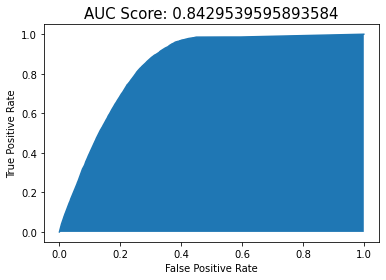

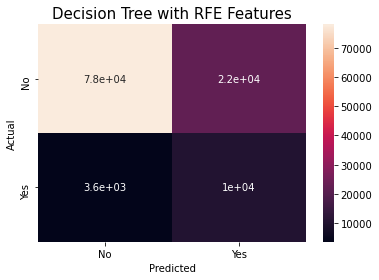

In [199]:
rfe_features =  xtrain_over.columns[rfe.ranking_ == 1]

dt_rfe = DecisionTreeClassifier().fit(xtrain_over[list(rfe_features)],ytrain_over)
f1_train_dt_rfe = f1_score(ytrain_over,dt_rfe.predict(xtrain_over[list(rfe_features)]))
f1_test_dt_rfe = f1_score(ytest,dt_rfe.predict(xtest[list(rfe_features)]))

print("f1 on train:",f1_train_dt_rfe)
print("f1 on test:",f1_test_dt_rfe)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt_rfe.predict(xtrain_over[list(rfe_features)])))
print()
cv_dt_rfe = cross_val_score(DecisionTreeClassifier(),xtrain_over[list(rfe_features)],ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt_rfe.mean())
print("Deviation in f1 scores:",cv_dt_rfe.std())
results_features.iloc[0,0] = "Recursive Feature Elimination"
results_features.iloc[0,1] = f1_train_dt_rfe
results_features.iloc[0,2] = f1_test_dt_rfe
results_features.iloc[0,3] = cv_dt_rfe.mean()
results_features.iloc[0,4] = cv_dt_rfe.std()
print()
print("Model Performance Report on test")
print(classification_report(ytest,dt_rfe.predict(xtest[list(rfe_features)])))

fpr, tpr, thres = roc_curve(ytest,dt_rfe.predict_proba(xtest[list(rfe_features)])[:,1])
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr)
plt.title(f"AUC Score: {roc_auc_score(ytest,dt_rfe.predict_proba(xtest[list(rfe_features)])[:,1])}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

sns.heatmap(confusion_matrix(ytest,dt_rfe.predict(xtest[list(rfe_features)])),annot=True)
plt.title("Decision Tree with RFE Features",size=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5,1.5],["No","Yes"])
plt.yticks([0.5,1.5],["No","Yes"])
plt.show()

In [200]:
sfs = SequentialFeatureSelector(DecisionTreeClassifier(),k_features="best",cv=3,scoring="f1").fit(xtrain_over,ytrain_over)

f1 on train: 0.751164163698424
f1 on test: 0.42418939053520327

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.90      0.82      0.86    234079
           1       0.69      0.82      0.75    117040

    accuracy                           0.82    351119
   macro avg       0.80      0.82      0.80    351119
weighted avg       0.83      0.82      0.82    351119


Mean of f1 scores: 0.7197732018973734
Deviation in f1 scores: 0.026870723482151634

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.94      0.81      0.87    100320
           1       0.32      0.64      0.42     14013

    accuracy                           0.79    114333
   macro avg       0.63      0.72      0.65    114333
weighted avg       0.86      0.79      0.81    114333



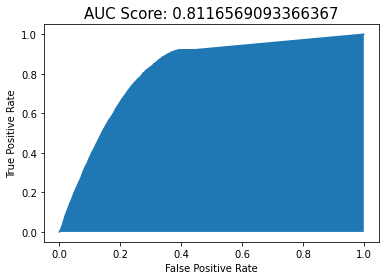

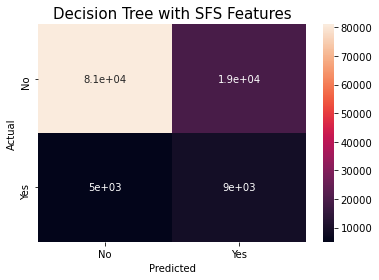

In [201]:
sfs_features = sfs.k_feature_names_

dt_sfs = DecisionTreeClassifier().fit(xtrain_over[list(sfs_features)],ytrain_over)
f1_train_dt_sfs = f1_score(ytrain_over,dt_sfs.predict(xtrain_over[list(sfs_features)]))
f1_test_dt_sfs = f1_score(ytest,dt_sfs.predict(xtest[list(sfs_features)]))

print("f1 on train:",f1_train_dt_sfs)
print("f1 on test:",f1_test_dt_sfs)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt_sfs.predict(xtrain_over[list(sfs_features)])))
print()
cv_dt_sfs = cross_val_score(DecisionTreeClassifier(),xtrain_over[list(sfs_features)],ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt_sfs.mean())
print("Deviation in f1 scores:",cv_dt_sfs.std())
results_features.iloc[1,0] = "Forward Feature Elimination"
results_features.iloc[1,1] = f1_train_dt_sfs
results_features.iloc[1,2] = f1_test_dt_sfs
results_features.iloc[1,3] = cv_dt_sfs.mean()
results_features.iloc[1,4] = cv_dt_sfs.std()
print()
print("Model Performance Report on test")
print(classification_report(ytest,dt_sfs.predict(xtest[list(sfs_features)])))

fpr, tpr, thres = roc_curve(ytest,dt_sfs.predict_proba(xtest[list(sfs_features)])[:,1])
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr)
plt.title(f"AUC Score: {roc_auc_score(ytest,dt_sfs.predict_proba(xtest[list(sfs_features)])[:,1])}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

sns.heatmap(confusion_matrix(ytest,dt_sfs.predict(xtest[list(sfs_features)])),annot=True)
plt.title("Decision Tree with SFS Features",size=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5,1.5],["No","Yes"])
plt.yticks([0.5,1.5],["No","Yes"])
plt.show()

In [202]:
importances = pd.DataFrame({"Features":xtrain_over.columns,"Importances":dt.feature_importances_})

In [203]:
importances.sort_values("Importances",ascending=False,inplace=True)

In [204]:
importances

,Features,Importances
5,x3_Vehicle_Not_Damaged,0.598484
0,Age,0.153195
2,x1_Vehicle_Not_Insured,0.047345
1,x0_Male,0.023919
8,x4_Region_28,0.015395
19,x5_Channel_152,0.013217
4,x2_Years1-2,0.011381
17,x4_Region_8,0.010810
21,x5_Channel_160,0.010530
22,x5_Channel_26,0.009771


f1 on train: 0.7156714646816621
f1 on test: 0.4472854199083225

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.89      0.77      0.83    234079
           1       0.64      0.81      0.72    117040

    accuracy                           0.79    351119
   macro avg       0.77      0.79      0.77    351119
weighted avg       0.81      0.79      0.79    351119


Mean of f1 scores: 0.7098196718505464
Deviation in f1 scores: 0.012355899185696443

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.96      0.77      0.85    100320
           1       0.32      0.76      0.45     14013

    accuracy                           0.77    114333
   macro avg       0.64      0.77      0.65    114333
weighted avg       0.88      0.77      0.80    114333



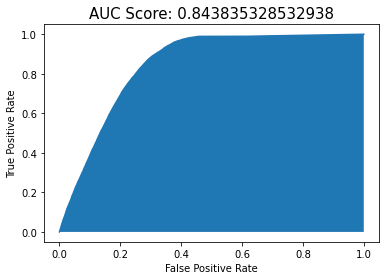

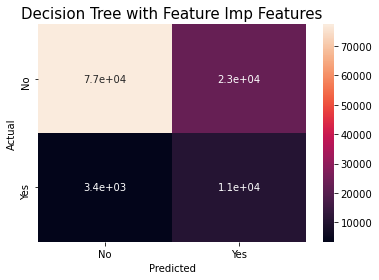

In [205]:
fe_features = importances[importances.Importances >= 0.01]["Features"].tolist()

dt_fe = DecisionTreeClassifier().fit(xtrain_over[list(fe_features)],ytrain_over)
f1_train_dt_fe = f1_score(ytrain_over,dt_fe.predict(xtrain_over[list(fe_features)]))
f1_test_dt_fe = f1_score(ytest,dt_fe.predict(xtest[list(fe_features)]))

print("f1 on train:",f1_train_dt_fe)
print("f1 on test:",f1_test_dt_fe)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt_fe.predict(xtrain_over[list(fe_features)])))
print()
cv_dt_fe = cross_val_score(DecisionTreeClassifier(),xtrain_over[list(fe_features)],ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt_fe.mean())
print("Deviation in f1 scores:",cv_dt_fe.std())
results_features.iloc[2,0] = "Feature Importances"
results_features.iloc[2,1] = f1_train_dt_fe
results_features.iloc[2,2] = f1_test_dt_fe
results_features.iloc[2,3] = cv_dt_fe.mean()
results_features.iloc[2,4] = cv_dt_fe.std()
print()
print("Model Performance Report on test")
print(classification_report(ytest,dt_fe.predict(xtest[list(fe_features)])))

fpr, tpr, thres = roc_curve(ytest,dt_fe.predict_proba(xtest[list(fe_features)])[:,1])
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr)
plt.title(f"AUC Score: {roc_auc_score(ytest,dt_fe.predict_proba(xtest[list(fe_features)])[:,1])}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

sns.heatmap(confusion_matrix(ytest,dt_fe.predict(xtest[list(fe_features)])),annot=True)
plt.title("Decision Tree with Feature Imp Features",size=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5,1.5],["No","Yes"])
plt.yticks([0.5,1.5],["No","Yes"])
plt.show()

In [206]:
results_features

,Model,Train F1,Test F1,CV Mean F1,CV std in scores
0,Recursive Feature Elimination,0.718195,0.446048,0.710206,0.012983
1,Forward Feature Elimination,0.751164,0.424189,0.719773,0.026871
2,Feature Importances,0.715671,0.447285,0.70982,0.012356


#### Inferences - 
Based on finding out the best set of features for a decision tree using multiple techniques, we concluded the following - 
- Using Forward Feature Elimination, the decision tree model scored the highest f1 score on train sample i.e 0.75. However, when using cross validation, the model scored the recorded higher deviation in scores than the other 2 models and also scored the lowest f1 score on test i.e 0.42 due to the instability.
- Between the decision tree models using set of features from Recursive feature elimination and feature importances, we had similar scores. However, the model using feature importances recorded a higher f1 score on test i.e 0.447 and lowest deviation in cross validation scores i.e 0.0123. Also, the model scored the highest auc score of 0.8438 amongst all models.

Hence we will use the decision tree model with set of features determined by feature importances.

## Parameter Optimization

In [207]:
from sklearn.model_selection import GridSearchCV

params = {"max_depth":range(2,10),"criterion":["gini","entropy"],"min_samples_leaf":[30,40,50],"min_samples_split":[60,80,100]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=params,cv=3,scoring="precision").fit(xtrain_over[list(fe_features)],ytrain_over)

In [208]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 30,
 'min_samples_split': 80}

f1 on train: 0.7089347706924904
f1 on test: 0.4501810297216029

Model Performance Report on train
              precision    recall  f1-score   support

           0       0.89      0.76      0.82    234079
           1       0.63      0.81      0.71    117040

    accuracy                           0.78    351119
   macro avg       0.76      0.79      0.76    351119
weighted avg       0.80      0.78      0.78    351119


Mean of f1 scores: 0.708798546717512
Deviation in f1 scores: 0.005027687275632038

Model Performance Report on test
              precision    recall  f1-score   support

           0       0.96      0.76      0.85    100320
           1       0.32      0.79      0.45     14013

    accuracy                           0.76    114333
   macro avg       0.64      0.77      0.65    114333
weighted avg       0.88      0.76      0.80    114333



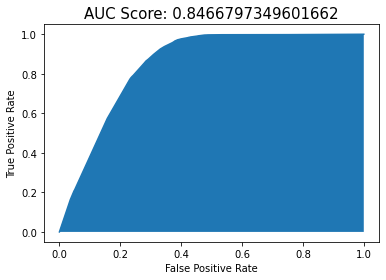

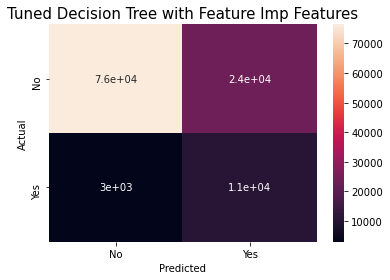

In [209]:
fe_features = importances[importances.Importances >= 0.01]["Features"].tolist()

dt_grid = DecisionTreeClassifier(criterion="gini",max_depth=9,min_samples_leaf=30,min_samples_split=80).fit(xtrain_over[list(fe_features)],ytrain_over)
f1_train_dt_grid = f1_score(ytrain_over,dt_grid.predict(xtrain_over[list(fe_features)]))
f1_test_dt_grid = f1_score(ytest,dt_grid.predict(xtest[list(fe_features)]))

print("f1 on train:",f1_train_dt_grid)
print("f1 on test:",f1_test_dt_grid)

print()
print("Model Performance Report on train")
print(classification_report(ytrain_over,dt_grid.predict(xtrain_over[list(fe_features)])))
print()
cv_dt_grid = cross_val_score(DecisionTreeClassifier(criterion="entropy",max_depth=9,min_samples_leaf=30,min_samples_split=80),xtrain_over[list(fe_features)],ytrain_over,cv=3,scoring="f1")
print("Mean of f1 scores:",cv_dt_grid.mean())
print("Deviation in f1 scores:",cv_dt_grid.std())
results_features.iloc[2,0] = "Feature Importances"
results_features.iloc[2,1] = f1_train_dt_grid
results_features.iloc[2,2] = f1_test_dt_grid
results_features.iloc[2,3] = cv_dt_grid.mean()
results_features.iloc[2,4] = cv_dt_grid.std()
print()
print("Model Performance Report on test")
print(classification_report(ytest,dt_grid.predict(xtest[list(fe_features)])))

fpr, tpr, thres = roc_curve(ytest,dt_grid.predict_proba(xtest[list(fe_features)])[:,1])
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr)
plt.title(f"AUC Score: {roc_auc_score(ytest,dt_grid.predict_proba(xtest[list(fe_features)])[:,1])}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

sns.heatmap(confusion_matrix(ytest,dt_grid.predict(xtest[list(fe_features)])),annot=True)
plt.title("Tuned Decision Tree with Feature Imp Features",size=15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5,1.5],["No","Yes"])
plt.yticks([0.5,1.5],["No","Yes"])
plt.show()

#### Inferences - 
- Based on finding the optimal parameters for decision tree using top features from feature importances, we obtained a model with a slight increase in f1 score on class 1 i.e from 0.447 to 0.450.
- Also the model noticed an increase in auc score from 0.8438 to 0.8466.
- The deviation in the cross validation scores dropped drastically from 0.012 to 0.005, which indicates the model has become more stable.

# Saving the Model

In [210]:
import pickle

In [211]:
model = pickle.dump(dt_grid,open("model.pkl","wb"))

# Business Interpretation of the Model

- We started with a dataset consisting of around 380K Health insurance holders, of which only 13% had gone on to purchase a vehicle insurance.


- Based on an in-depth analysis of all features and extensive trial and error, we have created a Decision tree model to predict which health insurance customers would buy a vehicle insurance.


- The model has been tuned with the optimal parameters to improve quality of the predictions.

**Key insights about the model** -
- For creating the models the most useful features for identifying potential vehicle insurance customers were chosen. These features can be the key focus points for salesmen or the organization to target when trying to identify potential vehicle insurance holders. The features were based on whether a health insurance holder - 
     - 1 Had a car which had been damaged before or not.
     - 2 Age of the holder.
     - 3 Had a vehicle that was not insured or not.
     - 4 Was a male or female
     - 5 Belonged to the regions coded 28, 152 or 8.
     - 6 Was approached by policy sales channel 152 or 160.
     - 7 Had a vehicle that was around 1-2 years old.
     
     
- Based on the chosen features and optimal parameters the final model produced a train f1 score of 0.75 during training phase and scored a f1 score of 0.45 during test. The model was very reliable and produced consistent results, based on a deviation in f1 scores across several test samples calculated to only 0.5%.


- During the testing phase, the model was able to identify close to 80% of the potential vehicle insurance holders in the sample.


However, **the model suffered from the following drawbacks** - 
- There was a huge difference in the test and train scores of the model indicating underfitting, which was a problem across almost all models created and tried due to the heavy imbalance in instances of health insurance holders who purchased vehicle insurance and those who did not.


- As a result, the learning of potential vehicle insurance holders was not robust during training.


- Oversampling for these class of customers in the train sample, we found that our results during the test phase had increased significantly


- However, while the scores during the test phase had improved significantly, there was still huge difference in the train and test results.


- As oversampling of minority class was not done in test, the models found it difficult to identify such records and as a result, was more biased in predictions towards those insurance holders who didnt buy a vehicle insurance.

**Suggestions** -

- To improve the model in the near future, more instances of health and vehicle insurance holders can be added to the data in order to retrain the model and get better results during test phase.